<b><font size = "+2">Car price prediction using regression analysis

<b>Data set from https://www.kaggle.com/hellbuoy/car-price-prediction</b>
<br><br><b>Objectives:</b> understand the factors affecting the pricing of cars in the American market, which variables are significant in predicting the price of a car, how well those variables describe the price of a car
<br><br><b>Business goal:</b> to understand how exactly the prices vary with the independent variables, to understand the pricing dynamics of a new market

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data preparation

In [3]:
# read csv file
df = pd.read_csv('CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<b><font size="+1">Drop unimportant columns

In [4]:
df1 = df.drop(['car_ID','symboling', 'CarName', 'enginelocation'], axis=1)
df1.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,2823,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,99.8,176.6,66.2,54.3,2337,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,99.4,176.6,66.4,54.3,2824,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# show column lenght, type and non-null data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   wheelbase         205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  enginetype        205 non-null    object 
 11  cylindernumber    205 non-null    object 
 12  enginesize        205 non-null    int64  
 13  fuelsystem        205 non-null    object 
 14  boreratio         205 non-null    float64
 15  stroke            205 non-null    float64
 16  compressionratio  205 non-null    float64
 1

<b>We will try to predict the price (our y variable) and we have 21 predictors (x variables), from 0 to 20

<b><font size="+1">Encoding categorial data into numeric data

In [6]:
# show categorial variables content
# return series containing counts of unique values
df1['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [7]:
df1['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [8]:
df1['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [9]:
df1['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [10]:
df1['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [11]:
df1['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [12]:
df1['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [13]:
df1['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [14]:
# legend for encoding
legend_fueltype = {'fueltype': {'gas':1, 'diesel':2}}
legend_aspiration = {'aspiration': {'std':1, 'turbo':2}}
legend_doornumber = {'doornumber': {'four':4, 'two':2}}
legend_carbody = {'sedan':1, 'hatchback':2, 'wagon':3, 'hardtop':4, 'convertible':5}
legend_drivewheel = {'drivewheel': {'fwd':1, 'rwd':2, '4wd':3}}
legend_enginetype = {'enginetype': {'ohc':1, 'ohcf':2, 'ohcv':3, 'dohc':4, "l":5, 'rotor':4, 'dohcv':5}}
legend_cylindernumber = {'cylindernumber': {'four':4, 'six':6, 'five':5, 'eight':8, 'two':2, 'three':3, 'twelve':12}}
legend_fuelsystem = {'fuelsystem': {'mpfi':1, '2bbl':2, 'idi':3, '1bbl':4, 'spdi':5, '4bbl':6, 'spfi':7, 'mfi':8}}

In [15]:
# replace columns with numeric data acording to legend
df2 = df1.replace(legend_fueltype)
df3 = df2.replace(legend_aspiration)
df4 = df3.replace(legend_doornumber)
df5 = df4.replace(legend_carbody)
df6 = df5.replace(legend_drivewheel)
df7 = df6.replace(legend_enginetype)
df8 = df7.replace(legend_cylindernumber)
df9 = df8.replace(legend_fuelsystem)
df9.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,1,2,5,2,88.6,168.8,64.1,48.8,2548,...,130,1,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,1,2,5,2,88.6,168.8,64.1,48.8,2548,...,130,1,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,2,2,2,94.5,171.2,65.5,52.4,2823,...,152,1,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,1,4,1,1,99.8,176.6,66.2,54.3,2337,...,109,1,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,1,4,1,3,99.4,176.6,66.4,54.3,2824,...,136,1,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
# show new dataframe column types
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    int64  
 1   aspiration        205 non-null    int64  
 2   doornumber        205 non-null    int64  
 3   carbody           205 non-null    int64  
 4   drivewheel        205 non-null    int64  
 5   wheelbase         205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  enginetype        205 non-null    int64  
 11  cylindernumber    205 non-null    int64  
 12  enginesize        205 non-null    int64  
 13  fuelsystem        205 non-null    int64  
 14  boreratio         205 non-null    float64
 15  stroke            205 non-null    float64
 16  compressionratio  205 non-null    float64
 1

In [17]:
# show shape of dataframe
# number of rows and columns
df9.shape

(205, 22)

In [18]:
# generate descriptive statistic; summarize the central tendency, dispersion and shape of distribution
df9.describe()

,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,1.097561,1.180488,3.121951,1.819512,1.458537,98.756585,174.049268,65.907805,53.724878,2555.565854,...,126.907317,1.990244,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,0.297446,0.385535,0.994966,0.990944,0.581148,6.021776,12.337289,2.145204,2.443522,520.680204,...,41.642693,1.306058,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,1.000000,2.000000,1.000000,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,...,61.000000,1.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,1.000000,4.000000,2.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,...,120.000000,2.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,1.000000,1.000000,4.000000,2.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,...,141.000000,2.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,2.000000,2.000000,4.000000,5.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,...,326.000000,8.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Preparing data for simple validation (train/test split)

<b><font size="+1">Split columns into independent variables/atributes (x) and dependent/target variable (y)

In [19]:
# dataframe for x and y
x_df = df9.drop(['price'], axis=1)
y_df = df9['price']
# numpy for x and y from dataframe
x = x_df.to_numpy()
y = y_df.to_numpy()

<b><font size="+1">Split data into train and test

In [20]:
tts = train_test_split(x_df, y_df, test_size=0.3, random_state=42)
x_train, x_test, y_train, y_test = tts

In [21]:
# dataframe from numpy with train data
df_x_train = pd.DataFrame(x_train)
df_y_train = pd.DataFrame(y_train)
df_x_train.columns = list(x_df.columns)
df_y_train.columns = ['price']

In [22]:
# dataframe from numpy with test data for y
# test data for x, after dimensionality reduction
df_y_test = pd.DataFrame(y_test)
df_y_test.columns = ['price']

# Dimensionality reduction

We will use feature selection (not feature extraction) because we need the initial x variables (not a combination of them), since we try to predict the price by x variables. Feature extraction methods (like PCA) don\`t work for our objectives, because they do not keep the initial x variables that we need for prediction

We will use: low correlation filter between predictors and the target variable, random forest and lasso regression for feature selection

## Low correlation filter between predictors and target variable

<b><font size="+1">Plot the correlation matrix of all features to see the correlation levels of predictor variables with the price

In [23]:
# prepare dataframe for correlation matrix
df_correlation_filter = pd.concat([df_x_train, df_y_train], axis=1)
cols = list(df9.columns)
df_correlation_filter.columns = cols
df_correlation_filter.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
177,1,1,4,2,1,102.4,175.6,66.5,53.9,2458,...,122,1,3.31,3.54,8.7,92,4200,27,32,11248.0
75,1,2,2,2,2,102.7,178.4,68.0,54.8,2910,...,140,1,3.78,3.12,8.0,175,5000,19,24,16503.0
174,2,2,4,1,1,102.4,175.6,66.5,54.9,2480,...,110,3,3.27,3.35,22.5,73,4500,30,33,10698.0
31,1,1,2,2,1,86.6,144.6,63.9,50.8,1819,...,92,4,2.91,3.41,9.2,76,6000,31,38,6855.0
12,1,1,2,1,2,101.2,176.8,64.8,54.3,2710,...,164,1,3.31,3.19,9.0,121,4250,21,28,20970.0


In [24]:
# compute correlation matrix
df_correlation_filter = df_correlation_filter.corr(method='pearson')
df_correlation_filter

,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
fueltype,1.000000,0.433999,0.268584,-0.138908,0.024401,0.306867,0.224471,0.204556,0.275555,0.185679,...,0.027384,0.272505,0.046774,0.190949,0.982616,-0.174653,-0.449616,0.270326,0.167080,0.051622
aspiration,0.433999,1.000000,0.104202,-0.095775,0.118130,0.274822,0.243677,0.265461,0.128166,0.277829,...,0.049602,0.199925,0.203115,0.146170,0.331488,0.212506,-0.162781,-0.170021,-0.229274,0.149314
doornumber,0.268584,0.104202,1.000000,-0.342669,-0.009085,0.483135,0.466742,0.242259,0.578345,0.242297,...,0.012581,-0.071248,0.107713,0.106018,0.243381,-0.111749,-0.241212,-0.010644,-0.044760,0.050788
carbody,-0.138908,-0.095775,-0.342669,1.000000,0.232208,-0.132197,-0.043660,-0.003346,-0.062397,0.144969,...,0.163225,-0.109095,0.192244,-0.142017,-0.154318,0.160055,-0.008156,-0.225769,-0.237939,0.154141
drivewheel,0.024401,0.118130,-0.009085,0.232208,1.000000,0.353807,0.401894,0.344142,0.087054,0.597980,...,0.440698,-0.240425,0.547703,-0.206925,-0.006511,0.457709,-0.171059,-0.536926,-0.591002,0.503460
wheelbase,0.306867,0.274822,0.483135,-0.132197,0.353807,1.000000,0.873137,0.770678,0.587438,0.763689,...,0.513343,-0.220278,0.457695,0.177613,0.246137,0.315935,-0.365501,-0.450056,-0.541073,0.550372
carlength,0.224471,0.243677,0.466742,-0.043660,0.401894,0.873137,1.000000,0.821267,0.471636,0.868949,...,0.643460,-0.331611,0.570298,0.125232,0.171994,0.511526,-0.329790,-0.652630,-0.692163,0.673316
carwidth,0.204556,0.265461,0.242259,-0.003346,0.344142,0.770678,0.821267,1.000000,0.252645,0.838544,...,0.710388,-0.273136,0.530869,0.159354,0.160541,0.625418,-0.220357,-0.634135,-0.664386,0.771034
carheight,0.275555,0.128166,0.578345,-0.062397,0.087054,0.587438,0.471636,0.252645,1.000000,0.261443,...,-0.013444,-0.174773,0.147698,-0.011268,0.241545,-0.141868,-0.283489,-0.034521,-0.106532,0.059881
curbweight,0.185679,0.277829,0.242297,0.144969,0.597980,0.763689,0.868949,0.838544,0.261443,1.000000,...,0.841292,-0.293029,0.622881,0.140339,0.128556,0.732840,-0.297485,-0.771963,-0.818683,0.838979


<AxesSubplot:>

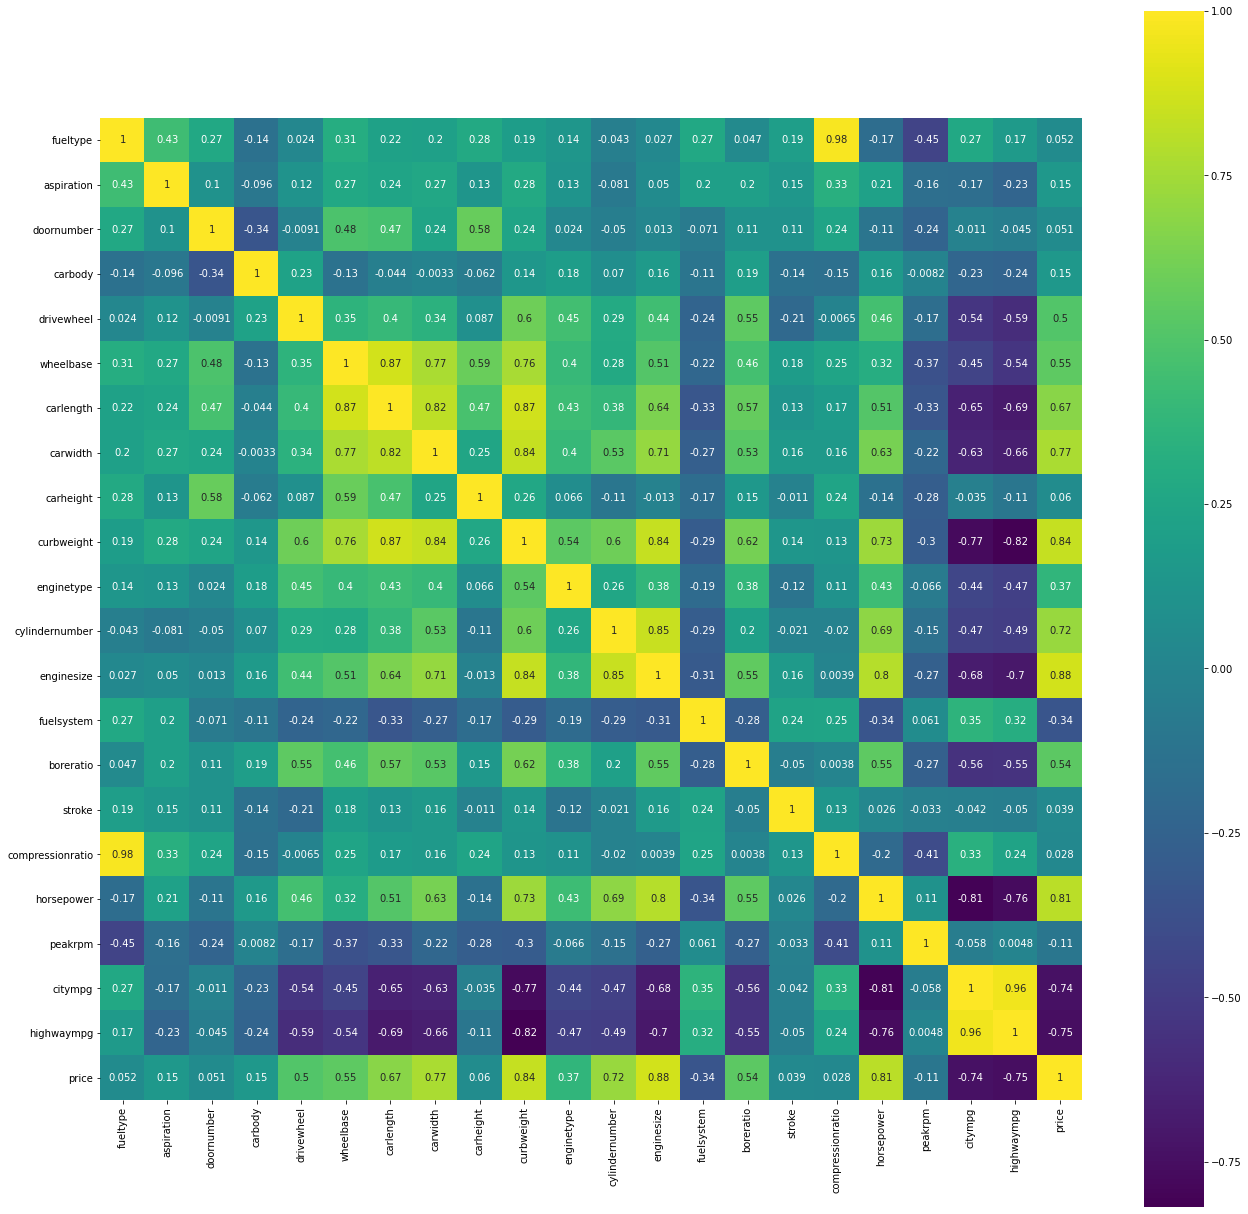

In [25]:
# vizualise correlation matrix
plt.figure(figsize=(22,22))
sns.heatmap(df_correlation_filter, vmax=1, square=True, annot=True, cmap='viridis')

Eliminate the x variables that have a low correlation level with the price (< 0.5) because they don\`t have the power to explain the price very well, and will keep the features that are highly correlated with the price (>=0.5)

In [26]:
# show relevant features (correlation with target variable >= 0.5)
correlation_target = abs(df_correlation_filter['price'])
relevant_features = correlation_target[correlation_target>=0.5]
relevant_features

drivewheel        0.503460
wheelbase         0.550372
carlength         0.673316
carwidth          0.771034
curbweight        0.838979
cylindernumber    0.719352
enginesize        0.876751
boreratio         0.543367
horsepower        0.811184
citympg           0.736946
highwaympg        0.749342
price             1.000000
Name: price, dtype: float64

In [27]:
# show irelevant features to drop (correlation with target variable < 0.5)
irelevant_features = correlation_target[correlation_target<0.5]
irelevant_features

fueltype            0.051622
aspiration          0.149314
doornumber          0.050788
carbody             0.154141
carheight           0.059881
enginetype          0.370266
fuelsystem          0.338934
stroke              0.039365
compressionratio    0.027901
peakrpm             0.108121
Name: price, dtype: float64

In [28]:
# drop irelevant features and initialize new dataframe for x_train with 11 features
df_x_train = df_x_train.drop(['fueltype','aspiration', 'doornumber', 'carbody', 'carheight',
                             'enginetype', 'fuelsystem', 'stroke', 'compressionratio', 'peakrpm'], axis=1)

In [29]:
df_x_train.head()

,drivewheel,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg
177,1,102.4,175.6,66.5,2458,4,122,3.31,92,27,32
75,2,102.7,178.4,68.0,2910,4,140,3.78,175,19,24
174,1,102.4,175.6,66.5,2480,4,110,3.27,73,30,33
31,1,86.6,144.6,63.9,1819,4,92,2.91,76,31,38
12,2,101.2,176.8,64.8,2710,6,164,3.31,121,21,28


<b><font size="+1">Correlation matrix with relevant features

In [30]:
# prepare dataframe for correlation matrix
df_correlation = pd.concat([df_x_train, df_y_train], axis=1)
df_correlation.head()

,drivewheel,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price
177,1,102.4,175.6,66.5,2458,4,122,3.31,92,27,32,11248.0
75,2,102.7,178.4,68.0,2910,4,140,3.78,175,19,24,16503.0
174,1,102.4,175.6,66.5,2480,4,110,3.27,73,30,33,10698.0
31,1,86.6,144.6,63.9,1819,4,92,2.91,76,31,38,6855.0
12,2,101.2,176.8,64.8,2710,6,164,3.31,121,21,28,20970.0


In [31]:
# compute correlation matrix
df_correlation = df_correlation.corr(method='pearson')
df_correlation

,drivewheel,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price
drivewheel,1.000000,0.353807,0.401894,0.344142,0.597980,0.285777,0.440698,0.547703,0.457709,-0.536926,-0.591002,0.503460
wheelbase,0.353807,1.000000,0.873137,0.770678,0.763689,0.280752,0.513343,0.457695,0.315935,-0.450056,-0.541073,0.550372
carlength,0.401894,0.873137,1.000000,0.821267,0.868949,0.383075,0.643460,0.570298,0.511526,-0.652630,-0.692163,0.673316
carwidth,0.344142,0.770678,0.821267,1.000000,0.838544,0.531980,0.710388,0.530869,0.625418,-0.634135,-0.664386,0.771034
curbweight,0.597980,0.763689,0.868949,0.838544,1.000000,0.600718,0.841292,0.622881,0.732840,-0.771963,-0.818683,0.838979
cylindernumber,0.285777,0.280752,0.383075,0.531980,0.600718,1.000000,0.848633,0.204694,0.693374,-0.466920,-0.485527,0.719352
enginesize,0.440698,0.513343,0.643460,0.710388,0.841292,0.848633,1.000000,0.553012,0.799309,-0.680272,-0.701740,0.876751
boreratio,0.547703,0.457695,0.570298,0.530869,0.622881,0.204694,0.553012,1.000000,0.552224,-0.558705,-0.554606,0.543367
horsepower,0.457709,0.315935,0.511526,0.625418,0.732840,0.693374,0.799309,0.552224,1.000000,-0.811537,-0.764873,0.811184
citympg,-0.536926,-0.450056,-0.652630,-0.634135,-0.771963,-0.466920,-0.680272,-0.558705,-0.811537,1.000000,0.960887,-0.736946


<AxesSubplot:>

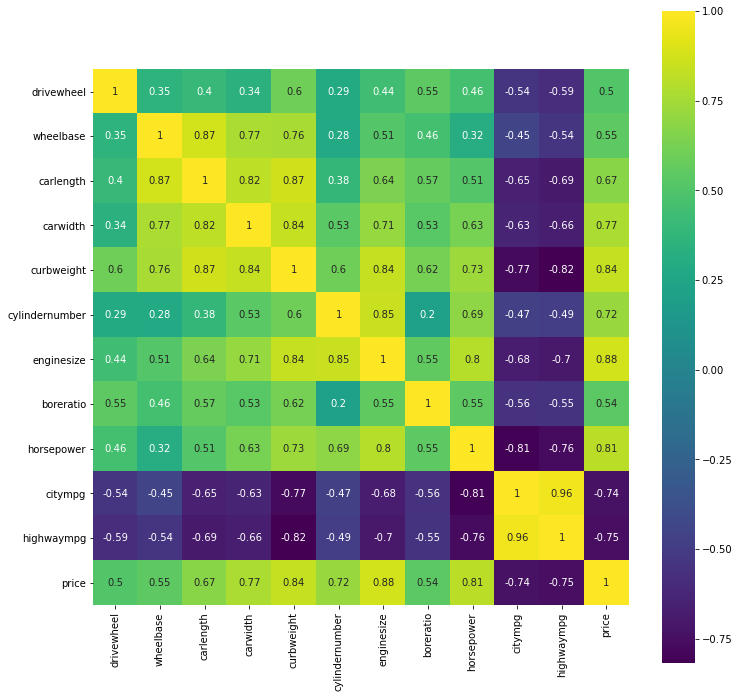

In [32]:
# vizualise correlation matrix
plt.figure(figsize=(12,12))
sns.heatmap(df_correlation, vmax=1, square=True, annot=True, cmap='viridis')

In [33]:
# numpy with relevant features from data frame
x_train = df_x_train.to_numpy()

## Random Forest feature importance

<b>Random forest attribute feature_importances_ using mean decrease in impurity

In [34]:
# fit random forest regressor for data iteratively; best fit with depth = 10 and 900 decision trees
rf_dr = RandomForestRegressor(random_state=42, max_depth=10, n_estimators=900)
rf_dr.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=900, random_state=42)

In [35]:
# show random forest score
print("Score using Random Forest: %f" %rf_dr.score(x_train, y_train))

Score using Random Forest: 0.985529


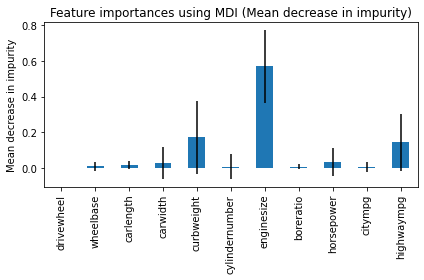

In [36]:
# vizualize feature importances

rf_feature = df_x_train.columns
rf_importance = rf_dr.feature_importances_

randforest_importance = pd.Series(rf_importance, index=rf_feature)
std = np.std([
    tree.feature_importances_ for tree in rf_dr.estimators_], axis=0)

fig, ax = plt.subplots()
randforest_importance.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI (Mean decrease in impurity)")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Lasso Regression for feature selection

Lasso regression will discard unuseful features, by making its coefficients equal to 0

In [37]:
# fit lasso regressor for data using cross-validation
lasso_dr = LassoCV()
lasso_dr.fit(x_train, y_train)

LassoCV()

In [38]:
# show best alpha value (regularization factor) that has the best score for the model
# show the score
print("Best alpha using LassoCV: %f" % lasso_dr.alpha_)
print("Best score using LassoCV: %f" % lasso_dr.score(x_train, y_train))

Best alpha using LassoCV: 3409.489922
Best score using LassoCV: 0.826424


In [39]:
# show value of coefficients after regularization
coef_list=sorted(zip(map(lambda x: round(x,2),lasso_dr.coef_.reshape(-1)),rf_feature),reverse=False)
for i in coef_list:
    print(i) 

(-0.0, 'boreratio')
(0.0, 'carlength')
(0.0, 'carwidth')
(-0.0, 'citympg')
(0.0, 'cylindernumber')
(0.0, 'drivewheel')
(-0.0, 'highwaympg')
(0.0, 'wheelbase')
(4.86, 'curbweight')
(47.55, 'horsepower')
(75.25, 'enginesize')


Text(0.5, 1.0, 'Feature importance using Lasso Model')

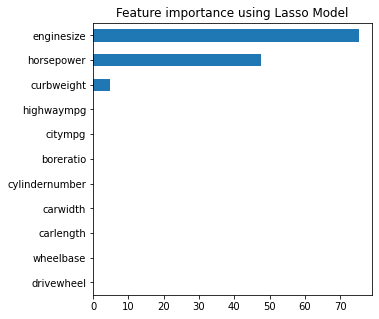

In [40]:
# vizualize feature importances
coef_lasso_dr = pd.Series(lasso_dr.coef_, index = df_x_train.columns)
imp_coef_lasso_dr = coef_lasso_dr.sort_values()
plt.rcParams['figure.figsize'] = (5.0, 5.0)
imp_coef_lasso_dr.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Random forest selection: enginesize, curbweight, highwaympg, horsepower. Lasso selection: enginesize, horsepower, curbweight

Except for highwaympg, both methods selected the same features. We will use all 4 features for modeling, because they are all important in establishing the car price

# Determining strategy and choosing the modelling techniques

<b><font size="+1">Plot correlation matrix in dataset with relevant features

In [41]:
# new dataframe with final relevant features
df_x_train = df_x_train.drop(['citympg', 'boreratio', 'cylindernumber',
                             'carwidth', 'carlength', 'wheelbase', 'drivewheel'], axis=1)
df_x_train.head()

,curbweight,enginesize,horsepower,highwaympg
177,2458,122,92,32
75,2910,140,175,24
174,2480,110,73,33
31,1819,92,76,38
12,2710,164,121,28


In [42]:
# prepare dataframe for correlation matrix
df_correlation_final = pd.concat([df_x_train, df_y_train], axis=1)
df_correlation_final.head()

,curbweight,enginesize,horsepower,highwaympg,price
177,2458,122,92,32,11248.0
75,2910,140,175,24,16503.0
174,2480,110,73,33,10698.0
31,1819,92,76,38,6855.0
12,2710,164,121,28,20970.0


In [43]:
# compute correlation matrix
df_correlation_final_matrix = df_correlation_final.corr(method='pearson')
df_correlation_final_matrix

,curbweight,enginesize,horsepower,highwaympg,price
curbweight,1.000000,0.841292,0.732840,-0.818683,0.838979
enginesize,0.841292,1.000000,0.799309,-0.701740,0.876751
horsepower,0.732840,0.799309,1.000000,-0.764873,0.811184
highwaympg,-0.818683,-0.701740,-0.764873,1.000000,-0.749342
price,0.838979,0.876751,0.811184,-0.749342,1.000000


<AxesSubplot:title={'center':'Correlation matrix'}>

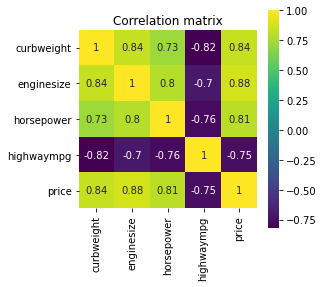

In [44]:
# vizualise correlation matrix
plt.figure(figsize=(4,4))
plt.title("Correlation matrix")
sns.heatmap(df_correlation_final_matrix, vmax=1, square=True, annot=True, cmap='viridis')

All x variables are highly correlated with the price, so we have multicollinearity. The solution to avoid multicollinearity in a multiple regression model, is to eliminate all correlated variables and keep just one of them, the one with the highest correlation with the target variable, in our case enginesize.

<b><font size="+1">Vizualise pairplot to determine the tipe of relationships between all pairs of variables

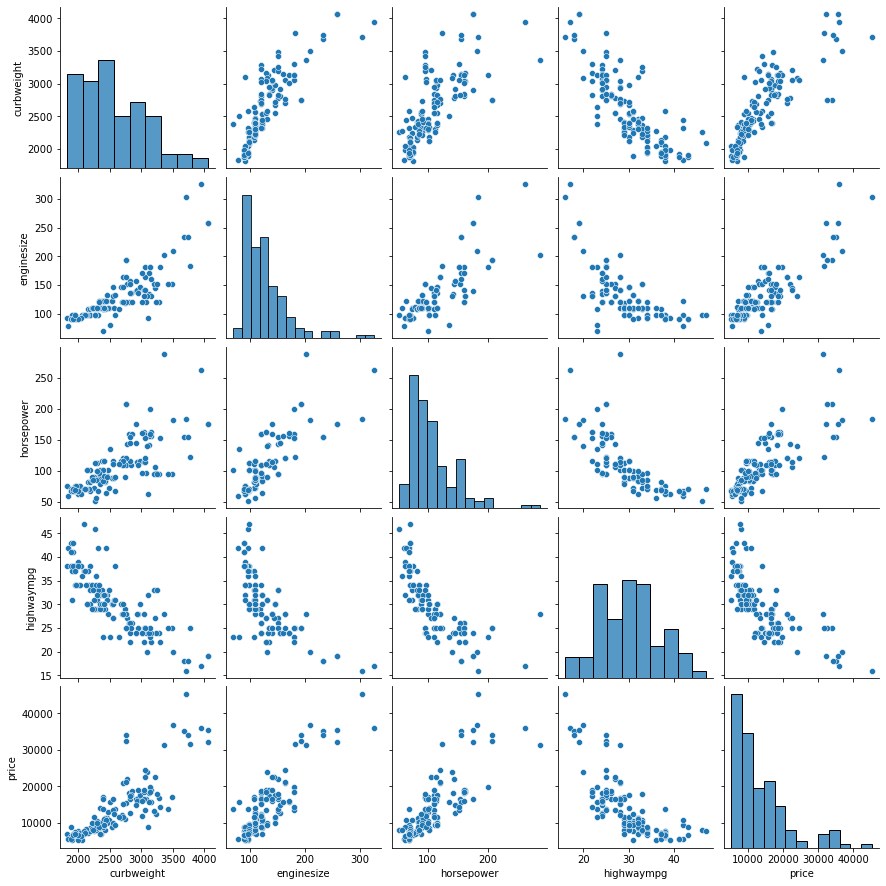

In [45]:
sns.pairplot(df_correlation_final)

The relationships between the variables look more or less linear

<b><font size="+1">Project assumptions:

1. The one predictor ideal model is not usefull for the project objectives (to make a business plan, you need a production plan and a budget projection and you can\`t do that by one variable, you need to know all important variables). 

2. One predictor can\`t contribute with as much information as many predictors. 

3. The predictors with the most influence on price level are: enginesize, curbweight, horsepower and highwaympg.

<b><font size="+1">Models:

Simple linear regression, regularization models (ridge and lasso regression), random forest regression:
$x = enginesize → y = preţ$

Multiple linear regression, regularization models (ridge and lasso regression), random forest regression:
$𝑥_𝑖= enginesize, curbweight, horsepower, highwaympg → 𝑦 = preţ$

Alternative model with random forest regression

<b><font size="+0.5">Linear regression

Fitting a linear equation to data:
<br>\- simple regression: $y=a+bx+ε$
<br>\- multiple regression: $y = a + b_1x_1 + b_2x_2 +⋯+ b_ix_i+ ε$
<br>Find the line for minimum SSE (sum of squared errors):
<br>$SSE=∑(y_i-â-b ̂x_i)^2 =∑(y_i-y ̑_i)^2 =minim$

<b><font size="+0.5">Ridge regression (L2 regularization) and Lasso regression (L1 regulatization)

The models add a penalty to the cost function of linear regression for bias variance tradeoff:
<br>\- ridge regression: $MSE=1/n ∑(y_i-y ̑_i)^2 + λ∑b^2$ 
<br>\- lasso regression: $MSE=1/n ∑(y_i-y ̑_i)^2 + λ∑|b|$

<b><font size="+0.5">Random forest

Ensemble learning model for regression. The algorithm constructs several decision trees and outputs the mean of the results of all individual trees as the prediction.
<br>It\`s a bagging technique and for each decision tree, the value interval of predictors is split in segments or regions. 
<br>For each tree, the nodes are determined by the value of the SSE of the segments (where $y ̑= $ the mean value of $y$)
<br><b>root node</b> $=min⁡\left\{SSE_i  | i∈R_i\right\}=min⁡\left\{∑(y_j-y ̑_j)^2  | i∈ R_i\right\}$

# Simple linear regression x = enginesize, y = price

In [46]:
# build feature dataframe and numpy
x_train_es_df = df_x_train.drop(['curbweight', 'horsepower','highwaympg'], axis=1)
x_train_es_np = x_train_es_df.to_numpy()

In [47]:
# test data
df_x_test = pd.DataFrame(x_test)
df_x_test.columns = list(x_df.columns)
x_test_es_df = df_x_test.drop(['fueltype','aspiration', 'doornumber', 'carbody', 'carheight',
                             'enginetype', 'fuelsystem', 'stroke', 'compressionratio', 'peakrpm',
                              'highwaympg','citympg', 'boreratio', 'cylindernumber',
                             'carwidth', 'carlength', 'wheelbase', 'drivewheel', 'curbweight', 'horsepower'], axis=1)
x_test_es_np = x_test_es_df.to_numpy()
x_test_es_df.head()

,enginesize
15,209
9,131
100,120
132,121
68,183


In [48]:
print('Training feature shape: ', x_train_es_np.shape)
print('Training target shape: ', y_train.shape)
print('Testing feature shape: ', x_test_es_np.shape)
print('Testing target shape: ', y_test.shape)

Training feature shape:  (143, 1)
Training target shape:  (143,)
Testing feature shape:  (62, 1)
Testing target shape:  (62,)


<b><font size="+0.5">Scatterplot

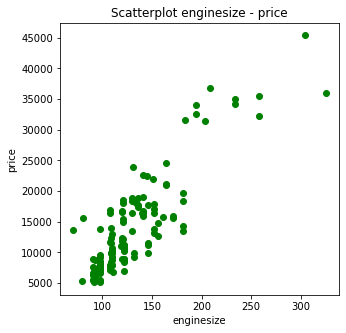

In [49]:
# Visualize the relationship between the two variables - looks linear
plt.scatter(x_train_es_np, y_train, color = "green")
plt.title('Scatterplot enginesize - price')
plt.xlabel("enginesize")
plt.ylabel("price")
plt.show()

<b>Training the model

In [50]:
reg_es = linear_model.LinearRegression()
reg_es.fit(x_train_es_np, y_train)

LinearRegression()

<b>Regression function formula

In [51]:
print("Intercept: ", reg_es.intercept_)
print("Slope: ", reg_es.coef_)
print('y = ', reg_es.intercept_, '+', reg_es.coef_ ,'x')

Intercept:  -7646.435077807868
Slope:  [165.76866245]
y =  -7646.435077807868 + [165.76866245] x


<b>Prediction/estimation of price

In [52]:
y_estimat_es = reg_es.predict(x_train_es_np)
print(y_estimat_es[:5])

[12577.34174141 15561.17766556 10588.11779198  7604.28186783
 19539.62556442]


In [53]:
y_estimat_es_test = reg_es.predict(x_test_es_np)
print(y_estimat_es_test[:5])

[26999.21537478 14069.25970348 12245.8044165  12411.57307896
 22689.23015102]


In [54]:
enginesize_es = 400
print("Predicted: ", reg_es.predict([[enginesize_es]]))

Predicted:  [58661.02990323]


In [55]:
y_pred_es_train = reg_es.predict(x_train_es_np)
y_pred_es_test = reg_es.predict(x_test_es_np)

<b><font size="+0.5">Scatterplot regresion function

Text(0, 0.5, 'Price')

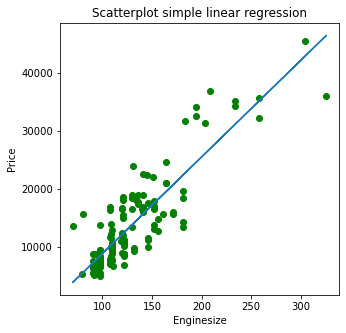

In [56]:
# Visualize regression line
plt.scatter(x_train_es_np, y_train, color = 'green')
plt.plot(x_train_es_np, y_estimat_es)
plt.title("Scatterplot simple linear regression")
plt.xlabel("Enginesize")
plt.ylabel("Price")

<b><font size="+0.5">Linear regression performance evaluation

In [57]:
# Score for training data (coeficient of determination: maximum value = 1)
score_es = reg_es.score(x_train_es_np, y_train)

In [58]:
# Score for test data
score_es_test = reg_es.score(x_test_es_np, y_test)

In [59]:
print("Training score Linear Regression:", score_es)
print("Testing score Linear Regression:", score_es_test)

Training score Linear Regression: 0.7686929078033782
Testing score Linear Regression: 0.7534902447506853


<b><font size="+0.5">Prediction method

In [60]:
# construim o metoda de predictie punctuala
def predict_consum_es(enginesize, coefficient, intercept):
    consum_es = enginesize * coefficient + intercept
    return consum_es 

In [61]:
enginesize = 183
y_estim_es = predict_consum_es(enginesize, reg_es.coef_, reg_es.intercept_)
print(y_estim_es)

[22689.23015102]


## Assumptions for simple linear regression

<b><font size="+0.5">Homoscendasticity

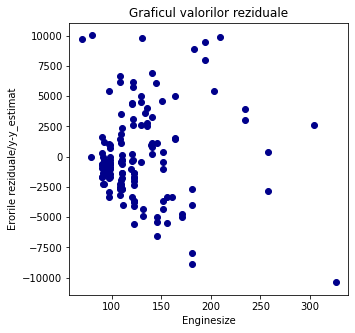

In [62]:
# Visualize residuals scatterplot
residuals_es = y_train - y_estimat_es
plt.plot(x_train_es_np, residuals_es, 'o', color='darkblue')
plt.title("Graficul valorilor reziduale")
plt.xlabel("Enginesize")
plt.ylabel("Erorile reziduale/y-y_estimat")
plt.show()

<b><font size="+0.5">Mean of residuals

In [63]:
mean_residuals_es = np.mean(residuals_es)
print(mean_residuals_es)

8.140931596289148e-13


<b><font size="+0.5">Normality of residuals

<AxesSubplot:title={'center':'Normalitatea erorilor'}, xlabel='price', ylabel='Count'>

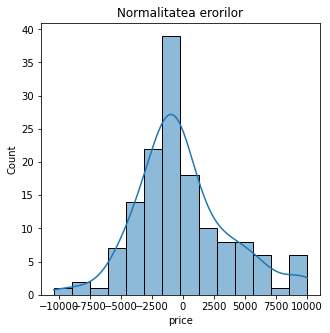

In [64]:
plt.title("Normalitatea erorilor")
sns.histplot(residuals_es, kde=True)

<b><font size="+0.5">Statsmodels

In [65]:
df_sm = pd.concat([x_train_es_df, df_y_train], axis=1)

In [66]:
model_es = smf.ols(formula='price ~ enginesize', data=df_sm).fit()
print(model_es.summary(alpha=0.05))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     468.6
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           1.14e-46
Time:                        12:04:29   Log-Likelihood:                -1379.9
No. Observations:                 143   AIC:                             2764.
Df Residuals:                     141   BIC:                             2770.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7646.4351   1022.771     -7.476      0.0

## Confidence interval and prediction interval

In [67]:
y_pred_es_train_df = pd.DataFrame(y_pred_es_train)

In [68]:
dif_es_lr_train = y_train - y_pred_es_train
sum_errs = np.power(dif_es_lr_train,2)
SSE_lr_train = np.sum(sum_errs)
errors_variance = np.sqrt((SSE_lr_train)/(len(x_train_es_np)-2))
square_deviations = (x_train_es_np - x_train_es_np.mean())**2
sum_square_deviations = sum((x_train_es_np - x_train_es_np.mean())**2)
prediction_standard_error = np.sqrt(1 + 1/len(x_train_es_np) + square_deviations/sum_square_deviations)
variance_est = errors_variance * prediction_standard_error

In [69]:
# Lower - upper for confidence interval
t_student = 1.646
low = y_pred_es_train_df.sub(t_student * variance_est)
low_np = low.to_numpy()
up = y_pred_es_train_df.add(t_student * variance_est)
up_np = up.to_numpy()

In [70]:
standard_err_reg = np.sqrt((1/len(x_train)) + (square_deviations/sum_square_deviations))
variance_est_reg = errors_variance * standard_err_reg

In [71]:
# Lower - upper for prediction interval
low_ic = y_pred_es_train_df.sub(t_student * variance_est_reg)
low_ic_np = low_ic.to_numpy()
up_ic = y_pred_es_train_df.add(t_student * variance_est_reg)
up_ic_np = up_ic.to_numpy()

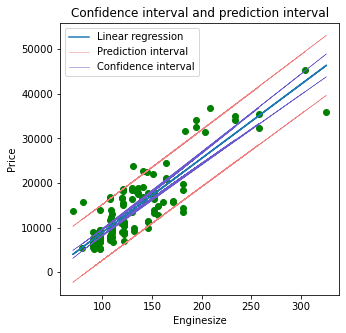

In [72]:
plt.scatter(x_train_es_np, y_train, color = 'green')
plt.plot(x_train_es_np, y_pred_es_train, label='Linear regression')
plt.plot(x_train_es_np, low_np, color = 'lightcoral', label='Prediction interval', linewidth=0.5)
plt.plot(x_train_es_np, up_np, color = 'lightcoral', linewidth=0.5)
plt.plot(x_train_es_np, low_ic_np, color = 'slateblue', label='Confidence interval', linewidth=0.5)
plt.plot(x_train_es_np, up_ic_np, color = 'slateblue', linewidth=0.5)
plt.xlabel("Enginesize")
plt.ylabel("Price")
plt.title("Confidence interval and prediction interval")
plt.legend()
plt.show()

# Lasso regression

In [73]:
lasso_es_cv = LassoCV()
lasso_es_cv.fit(x_train_es_np, y_train)

LassoCV()

In [74]:
print("Best alpha using LassoCV: %f" % lasso_es_cv.alpha_)
print("Best score using LassoCV: %f" % lasso_es_cv.score(x_train_es_np, y_train))

Best alpha using LassoCV: 8049.462427
Best score using LassoCV: 0.768069


In [75]:
lasso_es = Lasso(alpha=10)
lasso_es.fit(x_train_es_np, y_train)

Lasso(alpha=10)

In [76]:
y_estimat_es_lasso_test = lasso_es.predict(x_test_es_np)

In [77]:
print("Lasso score for train data: ", lasso_es.score(x_train_es_np, y_train))
print("Lasso score for test data:", lasso_es.score(x_test_es_np, y_test))

Lasso score for train data:  0.768692906841079
Lasso score for test data: 0.753488372850983


# Ridge regression

In [78]:
ridge_es_cv = RidgeCV(alphas=np.arange(1,100,5), scoring='r2', cv=10)
ridge_es_cv.fit(x_train_es_np, y_train)

RidgeCV(alphas=array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96]),
        cv=10, scoring='r2')

In [79]:
ridge_es = Ridge(alpha=96)
ridge_es.fit(x_train_es_np, y_train)
print("Ridge score: ", ridge_es.score(x_train_es_np, y_train))

Ridge score:  0.7686927887221378


In [80]:
y_estimat_es_ridge_test = ridge_es.predict(x_test_es_np)

In [81]:
print("Ridge score for train data: ", ridge_es.score(x_train_es_np, y_train))
print("Ridge score for test data:", ridge_es.score(x_test_es_np, y_test))

Ridge score for train data:  0.7686927887221378
Ridge score for test data: 0.7534693223021086


# Random Forest regression with one predictor

In [82]:
rf_es = RandomForestRegressor(n_estimators=900, random_state=42)
rf_es.fit(x_train_es_np, y_train)

RandomForestRegressor(n_estimators=900, random_state=42)

In [83]:
print("Score for train data:", rf_es.score(x_train_es_np, y_train))
print("Score for test data:", rf_es.score(x_test_es_np, y_test))

Score for train data: 0.9314700104049247
Score for test data: 0.9100676241215663


In [84]:
y_pred_es_rf_train = rf_es.predict(x_train_es_np)
y_pred_es_rf_test = rf_es.predict(x_test_es_np)

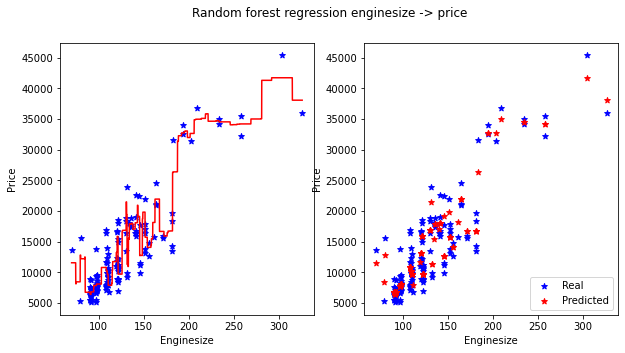

In [85]:
plt.figure(figsize=(10,5))
plt.suptitle('Random forest regression enginesize -> price')
plt.subplot(1,2,1)
X_grid = np.arange(min(x_train_es_np), max(x_train_es_np), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_train_es_np, y_train, marker='*', color = 'blue')
plt.plot(X_grid, rf_es.predict(X_grid), 'red')
plt.xlabel('Enginesize')
plt.ylabel('Price')
plt.subplot(1,2,2)
plt.scatter(x_train_es_np, y_train, c = 'b', alpha = 1, marker = '*', label = 'Real')
plt.scatter(x_train_es_np, y_pred_es_rf_train, c = 'r', alpha = 1, marker = '*', label = 'Predicted')
plt.xlabel('Enginesize')
plt.ylabel('Price')
plt.legend(loc = 'lower right')
plt.show()

<b>Predict the price

In [86]:
enginesize_es_rf = 183
rf_es_yhat = rf_es.predict([[enginesize_es_rf]])
print("Predicted: ", rf_es_yhat)

Predicted:  [26406.30377425]


<b><font size="+2">Multiple regression x = enginesize, curbweight, horsepower, hughwaympg, y = price 

<b>Build feature dataframe and numpy

In [87]:
# train data
x_train_m_df = df_x_train
x_train_m_df.head()

,curbweight,enginesize,horsepower,highwaympg
177,2458,122,92,32
75,2910,140,175,24
174,2480,110,73,33
31,1819,92,76,38
12,2710,164,121,28


In [88]:
x_train_m_np = x_train_m_df.to_numpy()

In [89]:
# test data
x_test_m_df = df_x_test.drop(['fueltype','aspiration', 'doornumber', 'carbody', 'carheight',
                             'enginetype', 'fuelsystem', 'stroke', 'compressionratio', 'peakrpm',
                              'citympg', 'boreratio', 'cylindernumber','carwidth', 'carlength', 
                              'wheelbase', 'drivewheel'], axis=1)
x_test_m_np = x_test_m_df.to_numpy()
x_test_m_df.head()

,curbweight,enginesize,horsepower,highwaympg
15,3230,209,182,22
9,3053,131,160,22
100,2302,120,97,34
132,2658,121,110,28
68,3750,183,123,25


In [90]:
print('Training feature shape: ', x_train_m_np.shape)
print('Training target shape: ', y_train.shape)
print('Testing feature shape: ', x_test_m_np.shape)
print('Testing target shape: ', y_test.shape)

Training feature shape:  (143, 4)
Training target shape:  (143,)
Testing feature shape:  (62, 4)
Testing target shape:  (62,)


# Multiple linear regression

In [91]:
reg_m = linear_model.LinearRegression()
reg_m.fit(x_train_m_np, y_train) 

LinearRegression()

In [92]:
#### Regresion function formula
print("Intercept: ", reg_m.intercept_)
print("Slope: ", reg_m.coef_)
print('y = ', reg_m.intercept_, '+', reg_m.coef_ ,'xi')

Intercept:  -9524.689312612985
Slope:  [  3.82247295  82.78858615  44.86893789 -71.26461143]
y =  -9524.689312612985 + [  3.82247295  82.78858615  44.86893789 -71.26461143] xi


<b><font size="+0.5">Prediction

In [93]:
curbweight_m = 3715
enginesize_m = 304
horsepower_m = 184
highwaympg_m = 16
print("Predicted: ", reg_m.predict([[curbweight_m, enginesize_m, horsepower_m, highwaympg_m]]))

Predicted:  [36959.17869129]


In [94]:
y_pred_m_train = reg_m.predict(x_train_m_np)
y_pred_m_test = reg_m.predict(x_test_m_np)

<b><font size="+0.5">Multiple linear regression performance evaluation

In [95]:
score_m_train = reg_m.score(x_train_m_np, y_train)
score_m_test = reg_m.score(x_test_m_np, y_test)

In [96]:
print("Training score Multiple Linear Regression:", score_m_train)
print("Testing score Multiple Linear Regression:", score_m_test)

Training score Multiple Linear Regression: 0.8276371186582472
Testing score Multiple Linear Regression: 0.7779681897661959


In [97]:
df_sm_m = pd.concat([x_train_m_df, df_y_train], axis=1)

In [98]:
model_m = smf.ols(formula='price ~ curbweight+enginesize+horsepower+highwaympg', data=df_sm_m).fit()
print(model_m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     165.7
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           1.20e-51
Time:                        12:04:58   Log-Likelihood:                -1358.9
No. Observations:                 143   AIC:                             2728.
Df Residuals:                     138   BIC:                             2743.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9524.6893   4973.971     -1.915      0.0

<b>Variance inflation factor

In [99]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(x_train_m_df.values, i) for i in range(x_train_m_df.shape[1])]
vif["variables"] = x_train_m_df.columns
print(vif)

         VIF   variables
0  59.072436  curbweight
1  45.814650  enginesize
2  23.913537  horsepower
3   8.786194  highwaympg


<b>Residuals scatter plot

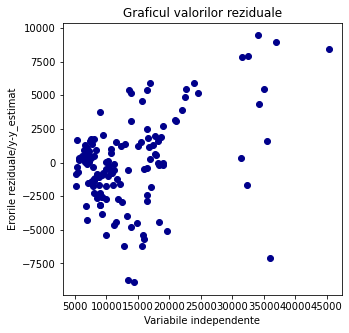

In [100]:
residuals_m = y_train - y_pred_m_train
plt.plot(y_train, residuals_m, 'o', color='darkblue')
plt.title("Graficul valorilor reziduale")
plt.xlabel("Variabile independente")
plt.ylabel("Erorile reziduale/y-y_estimat")
plt.show()

<b>Mean of errors

In [101]:
mean_residuals_m = np.mean(residuals_m)
print(mean_residuals_m)

-4.2231082655749954e-12


<b>Normality of erors

<AxesSubplot:title={'center':'Normalitatea erorilor'}, xlabel='price', ylabel='Count'>

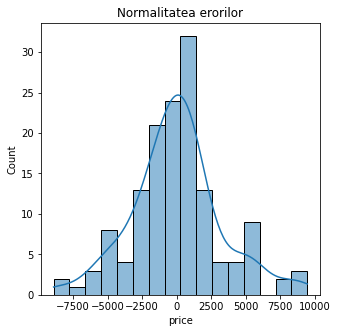

In [102]:
plt.title("Normalitatea erorilor")
sns.histplot(residuals_m, kde=True)

# Lasso regression - multiple variables

In [103]:
lasso_m_cv = LassoCV()
lasso_m_cv.fit(x_train_m_np, y_train)

LassoCV()

In [104]:
print("Best alpha using LassoCV: %f" % lasso_m_cv.alpha_)
print("Best score using LassoCV: %f" % lasso_m_cv.score(x_train_m_np, y_train))

Best alpha using LassoCV: 3409.489922
Best score using LassoCV: 0.826424


In [105]:
lasso_m = Lasso(alpha=3409)
lasso_m.fit(x_train_m_np, y_train)

Lasso(alpha=3409)

In [106]:
y_estimat_m_lasso_test = lasso_m.predict(x_test_m_np)

In [107]:
print("Lasso score for train data: ", lasso_m.score(x_train_m_np, y_train))
print("Lasso score for test data: ", lasso_m.score(x_test_m_np, y_test))

Lasso score for train data:  0.8264245493917548
Lasso score for test data:  0.7851431960695865


# Ridge regression - multiple variables

In [108]:
ridge_m_cv = RidgeCV(alphas=np.arange(1,100,5), scoring='r2', cv=10)
ridge_m_cv.fit(x_train_m_np, y_train)

RidgeCV(alphas=array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96]),
        cv=10, scoring='r2')

In [109]:
ridge_m = Ridge(alpha=96)
ridge_m.fit(x_train_m_np, y_train)

Ridge(alpha=96)

In [110]:
y_pred_m_ridge_train = ridge_m.predict(x_train_m_np)
y_pred_m_ridge_test = ridge_m.predict(x_test_m_np)

In [111]:
print("Ridge score for train data: ", ridge_m.score(x_train_m_np, y_train))
print("Ridge score for test data: ", ridge_m.score(x_test_m_np, y_test))

Ridge score for train data:  0.8276337348225176
Ridge score for test data:  0.7785735863859049


# Random Forest regression - multiple variables

In [112]:
rf_m = RandomForestRegressor(n_estimators=900, random_state=42)
rf_m.fit(x_train_m_np, y_train)

RandomForestRegressor(n_estimators=900, random_state=42)

In [113]:
print("Training score:", rf_m.score(x_train_m_np, y_train))
print("Testing score:", rf_m.score(x_test_m_np, y_test))

Training score: 0.9851888049910902
Testing score: 0.9417573358906299


In [114]:
y_pred_m_rf_train = rf_m.predict(x_train_m_np)
y_pred_m_rf_test = rf_m.predict(x_test_m_np)

<b><font size="+0.5">3d plot random forest regression with 2 independent variables (enginesize, curbweight -> price)

In [115]:
# build x_train
x_train_es_cw_df = df_x_train.drop(['horsepower','highwaympg'], axis=1)
x_train_es_cw_np = x_train_es_cw_df.to_numpy()

In [116]:
rf_es_cw = RandomForestRegressor(n_estimators=900, random_state=42)
rf_es_cw.fit(x_train_es_cw_np, y_train)

RandomForestRegressor(n_estimators=900, random_state=42)

In [117]:
print("Training score:", rf_es_cw.score(x_train_es_cw_np, y_train))

Training score: 0.9797530492269523


In [118]:
y_pred_es_cw_rf_train = rf_es_cw.predict(x_train_es_cw_np)

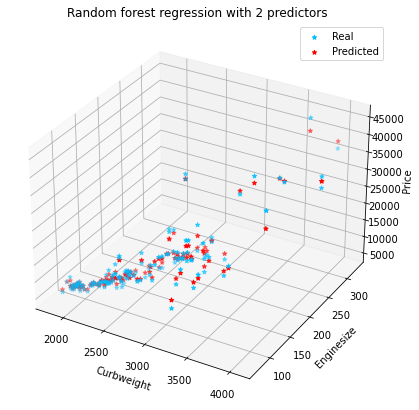

In [119]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train_es_cw_np[:,0], x_train_es_cw_np[:,1], y_train, marker='*', color='deepskyblue', label='Real')
ax.scatter(x_train_es_cw_np[:,0], x_train_es_cw_np[:,1], y_pred_es_cw_rf_train, marker='*', color='red', label='Predicted')
ax.set_xlabel("Curbweight")
ax.set_ylabel("Enginesize")
ax.set_zlabel("Price")
plt.title("Random forest regression with 2 predictors")
plt.legend(loc = 'upper right')
plt.show()

<b>Prediction method

In [120]:
curbweight_m_rf = 3715
enginesize_m_rf = 304
horsepower_m_rf = 184
highwaympg_m_rf = 16
print("Predicted: ", rf_m.predict([[curbweight_m_rf, enginesize_m_rf, horsepower_m_rf, highwaympg_m_rf]]))

Predicted:  [41827.98111111]


# Alternative model with Individual Random Forest Regressions

## Random forest regression: x = horsepower -> y = price

In [121]:
# train data
x_train_hp_df = df_x_train.drop(['enginesize', 'curbweight','highwaympg'], axis=1)
x_train_hp_np = x_train_hp_df.to_numpy()
x_train_hp_df.head()

,horsepower
177,92
75,175
174,73
31,76
12,121


In [122]:
# test data
x_test_hp_df = df_x_test.drop(['fueltype','aspiration', 'doornumber', 'carbody', 'carheight',
                             'enginetype', 'fuelsystem', 'stroke', 'compressionratio', 'peakrpm',
                              'highwaympg','citympg', 'boreratio', 'cylindernumber',
                             'carwidth', 'carlength', 'wheelbase', 'drivewheel', 'curbweight', 'enginesize'], axis=1)
x_test_hp_np = x_test_hp_df.to_numpy()
x_test_hp_df.head()

,horsepower
15,182
9,160
100,97
132,110
68,123


In [123]:
print('Training feature shape: ', x_train_hp_np.shape)
print('Training target shape: ', y_train.shape)
print('Testing feature shape: ', x_test_hp_np.shape)
print('Testing target shape: ', y_test.shape)

Training feature shape:  (143, 1)
Training target shape:  (143,)
Testing feature shape:  (62, 1)
Testing target shape:  (62,)


In [124]:
rf_hp = RandomForestRegressor(n_estimators=900, random_state=42)
rf_hp.fit(x_train_hp_np, y_train)

RandomForestRegressor(n_estimators=900, random_state=42)

In [125]:
print("Training score:", rf_hp.score(x_train_hp_np, y_train))
print("Testing score:", rf_hp.score(x_test_hp_np, y_test))

Training score: 0.9390381296791721
Testing score: 0.893712922524077


In [126]:
y_pred_hp_rf_train = rf_hp.predict(x_train_hp_np)
y_pred_hp_rf_test = rf_hp.predict(x_test_hp_np)

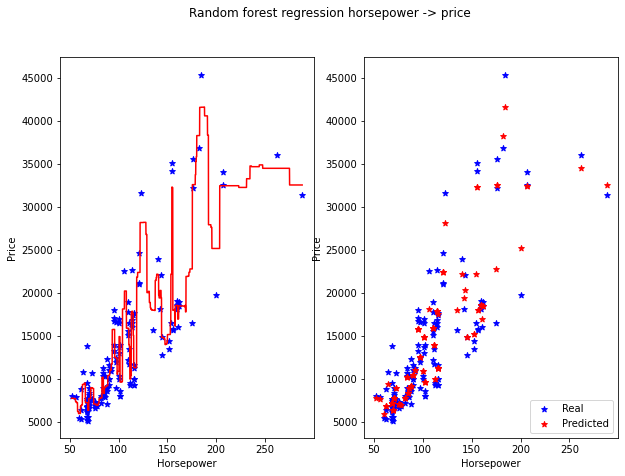

In [127]:
plt.figure(figsize=(10,7))
plt.suptitle('Random forest regression horsepower -> price')
plt.subplot(1,2,1)
X_grid = np.arange(min(x_train_hp_np), max(x_train_hp_np), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_train_hp_np, y_train, marker='*', color = 'blue')
plt.plot(X_grid, rf_hp.predict(X_grid), 'red')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.subplot(1,2,2)
plt.scatter(x_train_hp_np, y_train, c = 'b', alpha = 1, marker = '*', label = 'Real')
plt.scatter(x_train_hp_np, y_pred_hp_rf_train, c = 'r', alpha = 1, marker = '*', label = 'Predicted')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.legend(loc = 'lower right')
plt.show()

<b>Predict

In [128]:
horsepower_hp_rf = 800
rf_hp_yhat = rf_hp.predict([[horsepower_hp_rf]])
print("Predicted: ", rf_hp_yhat)

Predicted:  [32543.735]


## Random forest regression: x = curbweight -> y = price

In [129]:
# train data
x_train_cw_df = df_x_train.drop(['enginesize', 'horsepower','highwaympg'], axis=1)
x_train_cw_np = x_train_cw_df.to_numpy()
x_train_cw_df.head()

,curbweight
177,2458
75,2910
174,2480
31,1819
12,2710


In [130]:
# test data
x_test_cw_df = df_x_test.drop(['fueltype','aspiration', 'doornumber', 'carbody', 'carheight',
                             'enginetype', 'fuelsystem', 'stroke', 'compressionratio', 'peakrpm',
                              'highwaympg','citympg', 'boreratio', 'cylindernumber',
                             'carwidth', 'carlength', 'wheelbase', 'drivewheel', 'enginesize', 'horsepower'], axis=1)
x_test_cw_np = x_test_cw_df.to_numpy()
x_test_cw_df.head()

,curbweight
15,3230
9,3053
100,2302
132,2658
68,3750


In [131]:
print('Training feature shape: ', x_train_cw_np.shape)
print('Training target shape: ', y_train.shape)
print('Testing feature shape: ', x_test_cw_np.shape)
print('Testing target shape: ', y_test.shape)

Training feature shape:  (143, 1)
Training target shape:  (143,)
Testing feature shape:  (62, 1)
Testing target shape:  (62,)


In [132]:
rf_cw = RandomForestRegressor(n_estimators=800, random_state=42)
rf_cw.fit(x_train_cw_np, y_train)

RandomForestRegressor(n_estimators=800, random_state=42)

In [133]:
print("Training score:", rf_cw.score(x_train_cw_np, y_train))
print("Testing score:", rf_cw.score(x_test_cw_np, y_test))

Training score: 0.9559449334942587
Testing score: 0.6999301804712226


In [134]:
y_pred_cw_rf_train = rf_cw.predict(x_train_cw_np)
y_pred_cw_rf_test = rf_cw.predict(x_test_cw_np)

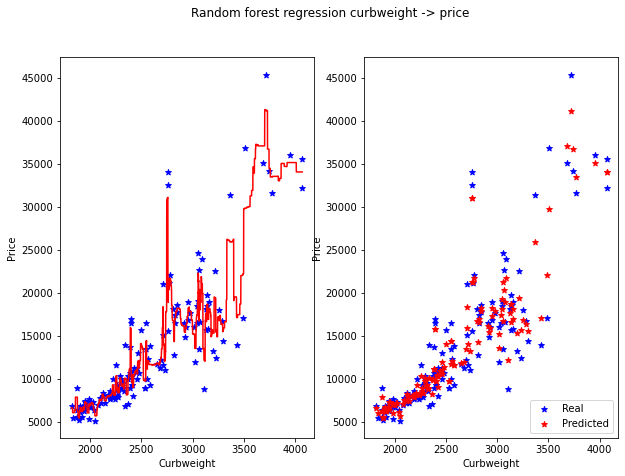

In [135]:
plt.figure(figsize=(10,7))
plt.suptitle('Random forest regression curbweight -> price')
plt.subplot(1,2,1)
X_grid = np.arange(min(x_train_cw_np), max(x_train_cw_np), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_train_cw_np, y_train, marker='*', color = 'blue')
plt.plot(X_grid, rf_cw.predict(X_grid), 'red')
plt.xlabel('Curbweight')
plt.ylabel('Price')
plt.subplot(1,2,2)
plt.scatter(x_train_cw_np, y_train, c = 'b', alpha = 1, marker = '*', label = 'Real')
plt.scatter(x_train_cw_np, y_pred_cw_rf_train, c = 'r', alpha = 1, marker = '*', label = 'Predicted')
plt.xlabel('Curbweight')
plt.ylabel('Price')
plt.legend(loc = 'lower right')
plt.show()

<b>Predict

In [136]:
curbweight_cw_rf = 800
rf_cw_yhat = rf_cw.predict([[curbweight_cw_rf]])
print("Predicted: ", rf_cw_yhat)

Predicted:  [6581.6715625]


## Random forest regression: x = highwaympg -> y = price

In [137]:
# train data
x_train_hm_df = df_x_train.drop(['enginesize', 'horsepower','curbweight'], axis=1)
x_train_hm_np = x_train_hm_df.to_numpy()
x_train_hm_df.head()

,highwaympg
177,32
75,24
174,33
31,38
12,28


In [138]:
# test data
x_test_hm_df = df_x_test.drop(['fueltype','aspiration', 'doornumber', 'carbody', 'carheight',
                             'enginetype', 'fuelsystem', 'stroke', 'compressionratio', 'peakrpm',
                              'curbweight','citympg', 'boreratio', 'cylindernumber',
                             'carwidth', 'carlength', 'wheelbase', 'drivewheel', 'enginesize', 'horsepower'], axis=1)
x_test_hm_np = x_test_hm_df.to_numpy()
x_test_hm_df.head()

,highwaympg
15,22
9,22
100,34
132,28
68,25


In [139]:
print('Training feature shape: ', x_train_hm_np.shape)
print('Training target shape: ', y_train.shape)
print('Testing feature shape: ', x_test_hm_np.shape)
print('Testing target shape: ', y_test.shape)

Training feature shape:  (143, 1)
Training target shape:  (143,)
Testing feature shape:  (62, 1)
Testing target shape:  (62,)


In [140]:
rf_hm = RandomForestRegressor(n_estimators=1400, random_state=42)
rf_hm.fit(x_train_hm_np, y_train)

RandomForestRegressor(n_estimators=1400, random_state=42)

In [141]:
print("Training score:", rf_hm.score(x_train_hm_np, y_train))
print("Testing score:", rf_hm.score(x_test_hm_np, y_test))

Training score: 0.8283316887045507
Testing score: 0.5966285064930259


In [142]:
y_pred_hm_rf_train = rf_hm.predict(x_train_hm_np)
y_pred_hm_rf_test = rf_hm.predict(x_test_hm_np)

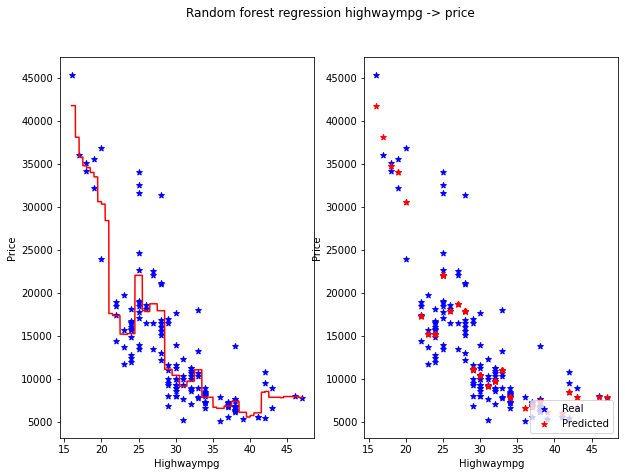

In [143]:
plt.figure(figsize=(10,7))
plt.suptitle('Random forest regression highwaympg -> price')
plt.subplot(1,2,1)
X_grid = np.arange(min(x_train_hm_np), max(x_train_hm_np), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_train_hm_np, y_train, marker='*', color = 'blue')
plt.plot(X_grid, rf_hm.predict(X_grid), 'red')
plt.xlabel('Highwaympg')
plt.ylabel('Price')
plt.subplot(1,2,2)
plt.scatter(x_train_hm_np, y_train, c = 'b', alpha = 1, marker = '*', label = 'Real')
plt.scatter(x_train_hm_np, y_pred_hm_rf_train, c = 'r', alpha = 1, marker = '*', label = 'Predicted')
plt.xlabel('Highwaympg')
plt.ylabel('Price')
plt.legend(loc = 'lower right')
plt.show()

<b>Predict

In [144]:
highwaympg_hm_rf = 800
rf_hm_yhat = rf_hm.predict([[highwaympg_hm_rf]])
print("Predicted: ", rf_hm_yhat)

Predicted:  [7804.48575]


## Prediction method with individual random forest regressions

I implemented in parallel the individual random forest models for each of the four predictors. Each model has a good score and each model predicts the price independently. The final prediction method uses the mean of the values predicted by the four individual models, but it takes the weighted mean, weighting the mean with the score of each model.

<b><font size="+0.5"> Method to input values for predictors

In [145]:
curbweight_cw_rf = 2458
enginesize_es_rf = 122
horsepower_hp_rf = 92
highwaympg_hm_rf = 37

In [146]:
rf_cw_yhat = rf_cw.predict([[curbweight_cw_rf]])
rf_es_yhat = rf_es.predict([[enginesize_es_rf]])
rf_hp_yhat = rf_hp.predict([[horsepower_hp_rf]])
rf_hm_yhat = rf_hm.predict([[highwaympg_hm_rf]])

In [147]:
predict_final = (0.93*rf_es_yhat + 0.94*rf_hp_yhat + 0.96*rf_cw_yhat + 0.83*rf_hm_yhat)/(0.93+0.94+0.96+0.83)
print(predict_final)

[9731.99272247]


<b><font size="+0.5">Method for predictors as vectors

In [148]:
predict_total_es_train = 0.9315 * y_pred_es_rf_train
predict_total_hp_train = 0.9390 * y_pred_hp_rf_train
predict_total_cw_train = 0.9559 * y_pred_cw_rf_train
predict_total_hm_train = 0.8283 * y_pred_hm_rf_train
predict_total_train = (predict_total_es_train + predict_total_hp_train + predict_total_cw_train
                 + predict_total_hm_train)/(0.9315+0.9390+0.9559+0.8283)

In [149]:
predict_total_es_test = 0.9315 * y_pred_es_rf_test
predict_total_hp_test = 0.9390 * y_pred_hp_rf_test
predict_total_cw_test = 0.9559 * y_pred_cw_rf_test
predict_total_hm_test = 0.8283 * y_pred_hm_rf_test
predict_total_test = (predict_total_es_test + predict_total_hp_test + predict_total_cw_test
                      + predict_total_hm_test)/(0.9315+0.9390+0.9559+0.8283)

# Comparing the performance of models

## Comparing the score of the models (coeficient of determination $R^2$ of the prediction)

In [150]:
print("\033[1m" + "Models with one predictor" + "\033[0m\n")

print("\033[1m" + "Linear Regression" + "\033[0m")
print("Training score:", score_es)
print("Testing score:", score_es_test, '\n')

print("\033[1m" + "Lasso Regression" + "\033[0m")
print("Training score:", lasso_es.score(x_train_es_np, y_train))
print("Testing score:", lasso_es.score(x_test_es_np, y_test), '\n')

print("\033[1m" + "Ridge Regression" + "\033[0m")
print("Training score:", ridge_es.score(x_train_es_np, y_train))
print("Testing score:", ridge_es.score(x_test_es_np, y_test), '\n')

print("\033[1m" + "Random Forest Regression" + "\033[0m")
print("Training score:", rf_es.score(x_train_es_np, y_train))
print("Testing score:", rf_es.score(x_test_es_np, y_test), '\n')

print(("\033[1m" + "Models with four predictors" + "\033[0m\n"))

print("\033[1m" + "Multiple Linear Regression" + "\033[0m")
print("Training score:", score_m_train)
print("Testing score:", score_m_test, '\n')

print("\033[1m" + "Lasso Regression" + "\033[0m")
print("Training score:", lasso_m.score(x_train_m_np, y_train))
print("Testing score:", lasso_m.score(x_test_m_np, y_test), '\n')

print("\033[1m" + "Ridge Regression" + "\033[0m")
print("Training score:", ridge_m.score(x_train_m_np, y_train))
print("Testing score:", ridge_m.score(x_test_m_np, y_test), '\n')

print("\033[1m" + "Random Forest Regression" + "\033[0m")
print("Training score:", rf_m.score(x_train_m_np, y_train))
print("Testing score:", rf_m.score(x_test_m_np, y_test), '\n')

Models with one predictor

Linear Regression
Training score: 0.7686929078033782
Testing score: 0.7534902447506853 

Lasso Regression
Training score: 0.768692906841079
Testing score: 0.753488372850983 

Ridge Regression
Training score: 0.7686927887221378
Testing score: 0.7534693223021086 

Random Forest Regression
Training score: 0.9314700104049247
Testing score: 0.9100676241215663 

Models with four predictors

Multiple Linear Regression
Training score: 0.8276371186582472
Testing score: 0.7779681897661959 

Lasso Regression
Training score: 0.8264245493917548
Testing score: 0.7851431960695865 

Ridge Regression
Training score: 0.8276337348225176
Testing score: 0.7785735863859049 

Random Forest Regression
Training score: 0.9851888049910902
Testing score: 0.9417573358906299 



For Ridge regression and Lasso regression the best score was iteratively determined. The score is not significantly better than the score of linear regression, so I keep only the linear regression models. Random forest got the best scores, but it can\`t extrapolate beyond the minimum and maximum value of the predictors.
<br>I keep the linear regresion models and random forest models.

## Comparing the adjusted coefficient of determination of linear models

The adjusted coeficient of determination is very important to determine if all predictors are significant to explain the model, because it is the coefficient of determination corrected with the degrees of freedom. If you add unsignificant x variables to the model, the <b>Adjusted </b>$R^2$ will decrease. If you add significant x variables, the coefficient will increase.



|Predictors|Adjusted$R^2$|
|:-|:-:|
|enginesize|0.769|
|enginesize+curbweight|0.801|
|enginesize+highwaympg|0.801|
|enginesize+horsepower|0.800|
|curbweight+horsepower+highwaympg|0.783|
|enginesize+curbweight+highwaympg|0.809|
|enginesize+horsepower+highwaympg|0.812|
|enginesize+curbweight+horsepower|0.823|
|enginesize+curbweight+horsepower+highwaympg|0.823|


The evolution of <b>Adjusted</b> $R^2$ shows that all four predictors are important for the model (I keep highwaympg because is an indicator of a very complex technology in fuel consumption)

## Comparing p-norm / $L_p$-norm of vectors

For a model to be really efficient, what matters the most is the difference or the distance between the initial values of y and the estimate values of y. Our y - the price is a vector of values and so is y esminate $y ̑ $. The best model must have the smallest distance between y vector and y estimate vector. This means that the values of price estimated by the model is very close the the initial/true values of price.

For a real number p ≥ 1, the <b>p-norm</b> or <b/>$L_p$-norm</b> of vector x is defined by: $||x||_p≔(\sum_{i=1}^{n}|x_i |^p)^{1/p}$

We have: $d_{l_p}(y_i,y ̑_i)=\sqrt[p]{\sum|y_i-y ̑_i|^p}$

If $p=1$&nbsp;&nbsp;&nbsp;=>&nbsp;&nbsp;&nbsp;$d_{l_1}=\sum|y_i-y ̑_i|$&nbsp;&nbsp;&nbsp;=>&nbsp;&nbsp;&nbsp;$\frac{1}{n}*d{l_1}=\frac{1}{n}*\sum|y_i-y ̑_i|=MAE$

If $p=2$&nbsp;&nbsp;&nbsp;=>&nbsp;&nbsp;&nbsp;$d_{l_2}=\sqrt{\sum(y_i-y ̑_i)^2}$&nbsp;&nbsp;&nbsp;=>&nbsp;&nbsp;&nbsp;$\sqrt{\frac{1}{n}}*d_{l_2}=\sqrt{\frac{1}{n}}*\sqrt{SSE}=RMSE$

If $p→∞$&nbsp;&nbsp;&nbsp;=>&nbsp;&nbsp;&nbsp;we have the maximum value of the vector, the farthest value of $y ̑ $ from it\`s true y: $d_{l_\infty}=max\{(y_i-y ̑_i),i=(\overline{1,n})\}$

<b><font size="+0.5">$d_{l_1}$ MAE (Mean absolute error)

<b>MAE for alternative method

In [151]:
diferenta_rf_total_train = y_train - predict_total_train
abs_diferenta_rf_total_train = np.absolute(diferenta_rf_total_train)
np.sum(abs_diferenta_rf_total_train)

171767.01885617676

In [152]:
MAE_train = np.sum(abs_diferenta_rf_total_train)/143

In [153]:
diferenta_rf_total_test = y_test - predict_total_test
abs_diferenta_rf_total_test = np.absolute(diferenta_rf_total_test)
np.sum(abs_diferenta_rf_total_test)

122545.94065402824

In [154]:
MAE_test = np.sum(abs_diferenta_rf_total_test)/62

In [155]:
print("\033[1m" + "Simple Linear Regression" + "\033[0m")
print("MAE for train data:", mean_absolute_error(y_train, y_pred_es_train))
print("MAE for test data:", mean_absolute_error(y_test, y_pred_es_test))
print("\033[1m" + "Random Forest Regression" + "\033[0m")
print("MAE for train data:", mean_absolute_error(y_train, y_pred_es_rf_train))
print("MAE for test data:", mean_absolute_error(y_test, y_pred_es_rf_test))
print("\033[1m" + "Multiple Linear Regression" + "\033[0m")
print("MAE for train data:", mean_absolute_error(y_train, y_pred_m_train))
print("MAE for test data:", mean_absolute_error(y_test, y_pred_m_test))
print("\033[1m" + "Random Forest Regression four predictors" + "\033[0m")
print("MAE for train data:", mean_absolute_error(y_train, y_pred_m_rf_train))
print("MAE for test data:", mean_absolute_error(y_test, y_pred_m_rf_test))
print("\033[1m" + "Alternative model" + "\033[0m")
print("MAE for train data:", MAE_train)
print("MAE for test data:", MAE_test)

Simple Linear Regression
MAE for train data: 2814.746731241352
MAE for test data: 2960.711029319918
Random Forest Regression
MAE for train data: 1594.2504157198389
MAE for test data: 1801.560005934164
Multiple Linear Regression
MAE for train data: 2352.2615470276764
MAE for test data: 2777.898818286327
Random Forest Regression four predictors
MAE for train data: 639.1751374736374
MAE for test data: 1455.1991831797231
Alternative model
MAE for train data: 1201.1679640292082
MAE for test data: 1976.5474299036812


<b><font size="+0.5">$d_{l_2}$ RMSE (Root mean square error)

<b>RMSE for alternative method

In [156]:
SSE_rf_total_train = np.power(diferenta_rf_total_train,2)

In [157]:
SSE_train = np.sum(SSE_rf_total_train)/143
RMSE_train = np.sqrt(SSE_train)

In [158]:
SSE_rf_total_test = np.power(diferenta_rf_total_test,2)

In [159]:
SSE_test = np.sum(SSE_rf_total_test)/62
RMSE_test = np.sqrt(SSE_test)

In [160]:
print("\033[1m" + "Simple linear Regression" + "\033[0m")
print("RMSE for train data:", np.sqrt(mean_squared_error(y_train, y_pred_es_train)))
print("RMSE for test data:", np.sqrt(mean_squared_error(y_test, y_pred_es_test)))
print("\033[1m" + "Random Forest Regression" + "\033[0m")
print("RMSE for train data:", np.sqrt(mean_squared_error(y_train, y_pred_es_rf_train)))
print("RMSE for test data:", np.sqrt(mean_squared_error(y_test, y_pred_es_rf_test)))
print("\033[1m" + "Multiple Linear Regression" + "\033[0m")
print("RMSE for train data:", np.sqrt(mean_squared_error(y_train, y_pred_m_train)))
print("RMSE for test data:", np.sqrt(mean_squared_error(y_test, y_pred_m_test)))
print("\033[1m" + "Random Forest Regression four predictors" + "\033[0m")
print("RMSE for train data:", np.sqrt(mean_squared_error(y_train, y_pred_m_rf_train)))
print("RMSE for test data:", np.sqrt(mean_squared_error(y_test, y_pred_m_rf_test)))
print("\033[1m" + "Alternative model" + "\033[0m")
print("RMSE for train data:", RMSE_train)
print("RMSE for test data:", RMSE_test)

Simple linear Regression
RMSE for train data: 3754.740832333188
RMSE for test data: 4132.707975899923
Random Forest Regression
RMSE for train data: 2043.7408422924682
RMSE for test data: 2496.1788356952934
Multiple Linear Regression
RMSE for train data: 3241.211445127199
RMSE for test data: 3922.159609703075
Random Forest Regression four predictors
RMSE for train data: 950.1245526860519
RMSE for test data: 2008.8073057122863
Alternative model
RMSE for train data: 1640.8847507957546
RMSE for test data: 2956.099692847791


<b><font size="+0.5">$d_{l_\infty}$ Max value

<b>Max value for alternative method

In [161]:
dist_rf_total_train_abs = abs(diferenta_rf_total_train)
dist_rf_total_train_abs_max = max(dist_rf_total_train_abs)

dist_rf_total_test_abs = abs(diferenta_rf_total_test)
dist_rf_total_test_abs_max = max(dist_rf_total_test_abs)

<b>Max value for simple regression methods

In [162]:
dist_es_train = y_train-y_pred_es_train
dist_es_train_abs = abs(dist_es_train)
dist_es_train_abs_max = max(dist_es_train_abs)

dist_es_test = y_test-y_pred_es_test
dist_es_test_abs = abs(dist_es_test)
dist_es_test_abs_max = max(dist_es_test_abs)

dist_es_rf_train = y_train-y_pred_es_rf_train
dist_es_rf_train_abs = abs(dist_es_rf_train)
dist_es_rf_train_abs_max = max(dist_es_rf_train_abs)

dist_es_rf_test = y_test-y_pred_es_rf_test
dist_es_rf_test_abs = abs(dist_es_rf_test)
dist_es_rf_test_abs_max = max(dist_es_rf_test_abs)

<b>Max value for multiple regression methods

In [163]:
dist_m_train = y_train-y_pred_m_train
dist_m_train_abs = abs(dist_m_train)
dist_m_train_abs_max = max(dist_m_train_abs)

dist_m_test = y_test-y_pred_m_test
dist_m_test_abs = abs(dist_m_test)
dist_m_test_abs_max = max(dist_m_test_abs)

dist_m_rf_train = y_train-y_pred_m_rf_train
dist_m_rf_train_abs = abs(dist_m_rf_train)
dist_m_rf_train_abs_max = max(dist_m_rf_train_abs)

dist_m_rf_test = y_test-y_pred_m_rf_test
dist_m_rf_test_abs = abs(dist_m_rf_test)
dist_m_rf_test_abs_max = max(dist_m_rf_test_abs)

In [164]:
print("\033[1m" + "Simple linear Regression" + "\033[0m")
print("Max value for train data: ", dist_es_train_abs_max)
print("Max value for test data: ", dist_es_test_abs_max)
print("\033[1m" + "Random Forest Regression" + "\033[0m")
print("Max value for train data: ", dist_es_rf_train_abs_max)
print("Max value for test data: ", dist_es_rf_test_abs_max)
print("\033[1m" + "Multiple Linear Regression" + "\033[0m")
print("Max value for train data: ", dist_m_train_abs_max)
print("Max value for test data: ", dist_m_test_abs_max)
print("\033[1m" + "Random Forest Regression four predictors" + "\033[0m")
print("Max value for train data: ", dist_m_rf_train_abs_max)
print("Max value for test data: ", dist_m_rf_test_abs_max)
print("\033[1m" + "Alternative model" + "\033[0m")
print("Max value for train data: ", dist_rf_total_train_abs_max)
print("Max value for test data: ", dist_rf_total_test_abs_max)

Simple linear Regression
Max value for train data:  10394.14888173886
Max value for test data:  14315.784625215027
Random Forest Regression
Max value for train data:  6105.320561393855
Max value for test data:  6435.125950191781
Multiple Linear Regression
Max value for train data:  9450.713279664196
Max value for test data:  14018.590977057538
Random Forest Regression four predictors
Max value for train data:  4089.720000000001
Max value for test data:  6706.101111111111
Alternative model
Max value for train data:  5278.7204930444295
Max value for test data:  11838.75867499327



|Performance|Spl Linear Reg|RF one Pred|Mult Linear Reg|RF four Pred|Alternative Model|
|:---------:|:----------:|:-------:|:-----------:|:--------:|:--------------:|
|MAE train data|2.814,75|1.594,25|2.352,26|639,18|1.201,17|
|MAE test data|2.960,71|1.801,56|2.777,90|1.455,20|1.976,55|
|RMSE train data|3.754,74|2.043,74|3.241,21|950,12|1.640,88|
|RMSE test data|4.132,71|2.496,18|3.922,16|2.008,81|2.956,10|
|Max train data|10.394,15|6.105,32|9.450,71|4.089,72|5.278,72|
|Max test data|14.315,78|6.435,13|14.018,59|6.706,10|11,838,76|

# Conclusions

For train data, the best model is RF with multiple predictors, second is the alternative model, and third is RF with one predictor.
For test data, the best model is RF with multiple predictors, second is RF with one predictor and third is the alternative model.
Multiple linear regression has better results than simple linear regression.

Given the particularities of the american car market, with big cars, high correlation between the selected predictors, it\`s very unlikely that the model can be applied to many other car markets, so the results for the test data are important only for similar markets. The european car market for example is very different: smaller cars, lower correlation between the enginesize, horsepower and curbweight of a car.

As for the "scary" problem of multicollinearity in multiple regression models, it determines the instability of the regression coefficients and will have a high standard error, the value of the t test and F test are unreliable and we can\`t say exactly the amount of contribution of each predictor in the model.   
<b>But, as the performance results show, multicollinearity doesn\`t affect the predictive capacity of the models.</b> Multiple regression models have the best performance.